# Part I: Data Preparation & Analysis


## Import all necessary libraries for running the seminar code

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Load the dataset 

In [8]:
dataset = pd.read_csv('./dataset_Seminar1.txt', header = None, sep = " ")
column_names = [
    '# of STAs', 'Load(Mbps)', 'Size(x)(m)', 'Size(y)(m)', 'Area(xy)',
    'Contention window(slots)', 'Channel width(Mhz)', 'Packet size(bits)', 'Max RSSI(dBm)',
    'Avg. RSSI(dBm)', 'Min. RSSI(dBm)', 'Avg. Probability of failure(0-1)', 'Throughput(bps)',
    'Average delay(s)', 'Total airtime', 'Proportional airtime'
]
dataset.columns = column_names
dataset.head()

,# of STAs,Load(Mbps),Size(x)(m),Size(y)(m),Area(xy),Contention window(slots),Channel width(Mhz),Packet size(bits),Max RSSI(dBm),Avg. RSSI(dBm),Min. RSSI(dBm),Avg. Probability of failure(0-1),Throughput(bps),Average delay(s),Total airtime,Proportional airtime
0,40.0,60000000.0,22.0,39.0,858.0,63.0,80.0,4000.0,-42.928330,-63.163012,-74.965338,0.415189,7.208644e+06,1.229466e+07,1.084041,0.875490
1,35.0,52500000.0,20.0,33.0,660.0,31.0,40.0,10000.0,-47.815800,-63.298410,-72.847989,0.485311,1.545116e+07,1.275042e+07,1.111263,0.873785
2,16.0,12000000.0,34.0,14.0,476.0,255.0,40.0,4000.0,-46.138494,-60.076333,-70.044800,0.099413,6.743660e+06,2.251690e+06,0.880036,0.849701
3,37.0,18500000.0,35.0,7.0,245.0,31.0,80.0,10000.0,-42.708813,-60.141393,-72.029643,0.493704,1.675025e+07,1.211374e+07,1.126341,0.860103
4,18.0,4500000.0,36.0,35.0,1260.0,127.0,160.0,8000.0,-45.492991,-63.780783,-76.225550,0.011664,4.500000e+06,1.446000e-03,0.276770,0.275687


## Display statistics about each feature in the dataset

In [9]:
dataset.describe()

,# of STAs,Load(Mbps),Size(x)(m),Size(y)(m),Area(xy),Contention window(slots),Channel width(Mhz),Packet size(bits),Max RSSI(dBm),Avg. RSSI(dBm),Min. RSSI(dBm),Avg. Probability of failure(0-1),Throughput(bps),Average delay(s),Total airtime,Proportional airtime
count,100000.000000,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000
mean,21.446170,2.140292e+07,20.562940,20.479640,421.270350,227.043920,75.106000,7997.580000,-45.911165,-57.577426,-66.467827,0.226676,9.716009e+06,4.688176e+06,0.780560,0.660724
std,11.554365,1.852042e+07,11.545206,11.540626,360.344349,323.350855,53.704279,2825.532513,5.400265,6.108548,8.057528,0.224848,4.958025e+06,7.875887e+06,0.360426,0.256756
min,2.000000,5.000000e+05,1.000000,1.000000,1.000000,3.000000,20.000000,4000.000000,-81.405165,-81.405165,-84.333834,0.000209,5.000000e+05,4.930000e-04,0.019793,0.019792
25%,11.000000,7.250000e+06,11.000000,11.000000,120.000000,15.000000,20.000000,6000.000000,-48.131476,-61.985000,-72.637078,0.036429,6.187692e+06,2.145750e-03,0.481082,0.473732
50%,21.000000,1.600000e+07,21.000000,20.000000,320.000000,63.000000,80.000000,8000.000000,-44.111064,-58.163205,-67.997587,0.126492,9.113764e+06,2.253349e+06,0.857473,0.781014
75%,31.000000,3.000000e+07,31.000000,30.000000,640.000000,255.000000,160.000000,10000.000000,-41.888821,-53.589525,-61.525848,0.400686,1.343290e+07,8.224326e+06,1.069432,0.866646
max,41.000000,8.200000e+07,40.000000,40.000000,1600.000000,1023.000000,160.000000,12000.000000,-40.863587,-40.865960,-40.865960,0.765422,2.262273e+07,5.330772e+08,1.449354,0.946776


## Plot relevant figures to visualize the data distribution

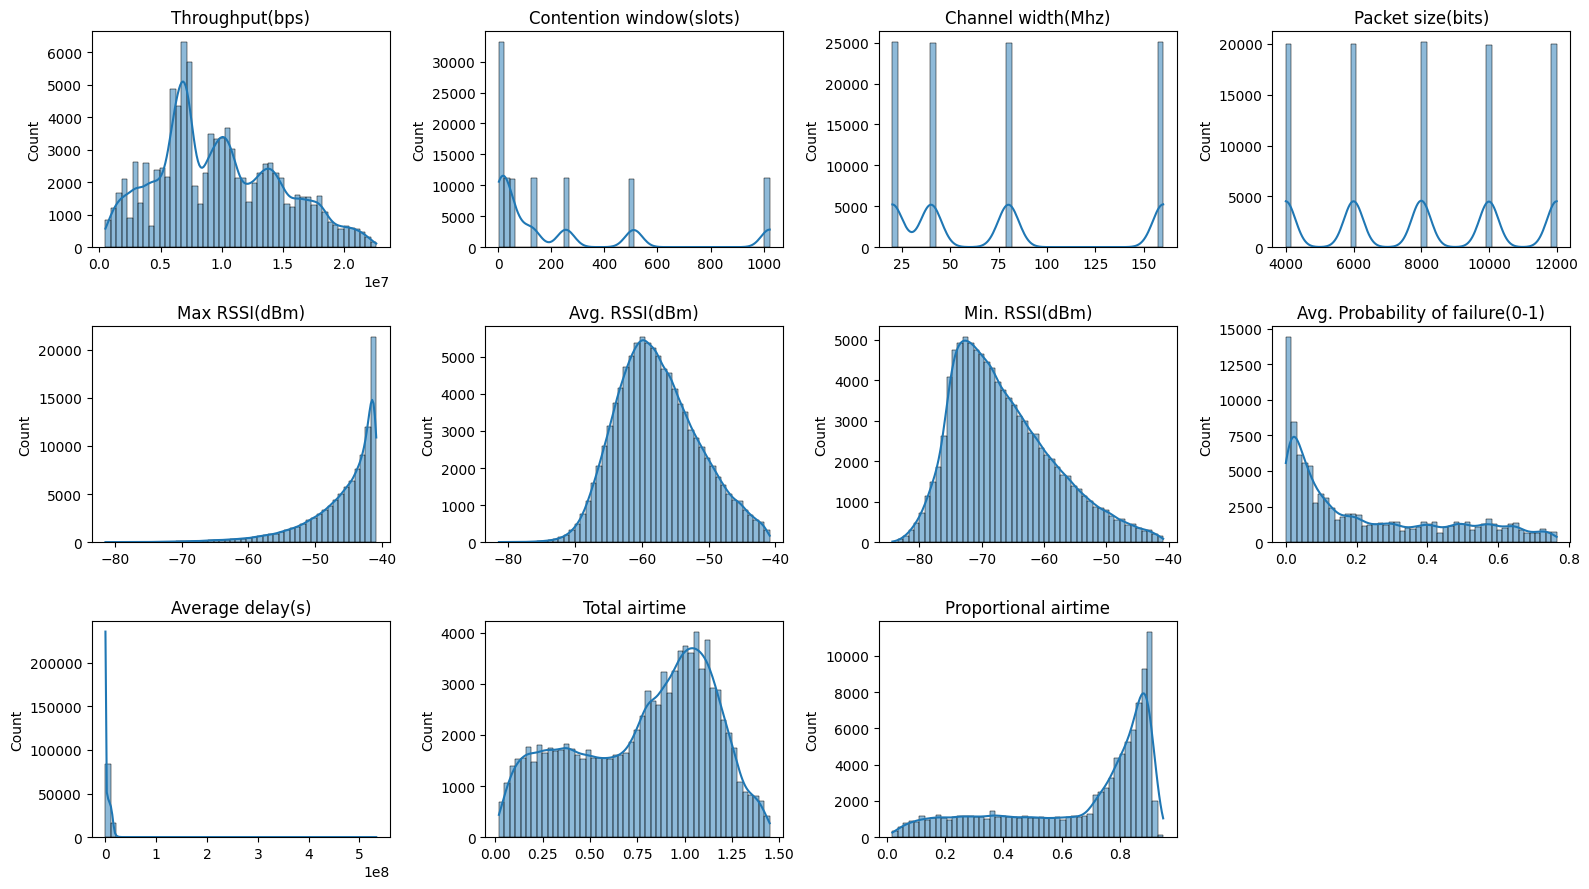

In [10]:
# Compact Mosaic of Histograms via Seaborn + Matplotlib

# List of features to visualize, we plot most of them but the most relevant is the throughput (we are asked to focus on it)
features = [
    'Throughput(bps)', 'Contention window(slots)', 'Channel width(Mhz)',
    'Packet size(bits)', 'Max RSSI(dBm)', 'Avg. RSSI(dBm)',
    'Min. RSSI(dBm)', 'Avg. Probability of failure(0-1)',
    'Average delay(s)', 'Total airtime', 'Proportional airtime'
]

# Compute grid size
n_feats = len(features) #11 features
n_cols = 4
n_rows = int(np.ceil(n_feats / n_cols)) # 3 rows

# Create subplots grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 3))
axes = axes.flatten()

# Plot each distribution
for idx, feat in enumerate(features):
    sns.histplot(
        dataset[feat].dropna(),
        bins=50,
        ax=axes[idx],
        kde=True
    )
    axes[idx].set_title(feat)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Count')

# Turn off any unused axes
for ax in axes[n_feats:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

## Data preprocessing

In [11]:
# Preprocessing & Train/Test Split

dataset_copy = dataset.copy() # We will use a copy of the dataset in case we need to original one for something else

# Feature groups by categorical, log and continuous.
cat_feats = [
    'Contention window(slots)',
    'Channel width(Mhz)',
    'Packet size(bits)'
]
log_feats = [
    'Throughput(bps)',
    'Average delay(s)',
    'Avg. Probability of failure(0-1)'
]
cont_feats = [
    'Max RSSI(dBm)', 'Avg. RSSI(dBm)', 'Min. RSSI(dBm)',
    'Total airtime', 'Proportional airtime'
]

def build_preprocessing_pipeline():
    # Categoricals: impute (most frequent) + one-hot
    cat_pipe = Pipeline([
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(handle_unknown='ignore'))
    ])
    # Log-transform + scale
    log_pipe = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('log', FunctionTransformer(np.log1p, validate=False)),
        ('scale', StandardScaler())
    ])
    # Continuous: impute + scale
    cont_pipe = Pipeline([
        ('impute', SimpleImputer(strategy='median')),
        ('scale', StandardScaler())
    ])
    return ColumnTransformer([
        ('cat',  cat_pipe,  cat_feats),
        ('log',  log_pipe,  log_feats),
        ('cont', cont_pipe, cont_feats)
    ])


## Split the dataset into training and testing sets and apply the preprocessing pipeline


In [12]:
# Prepare X, y
y = dataset_copy['Throughput(bps)'] # The prediction variable is going to be the Throughput
X = dataset_copy[cat_feats + log_feats + cont_feats]

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
) # We use a 80 % 20 % split between train and test

# Fit preprocessing
preprocessor = build_preprocessing_pipeline()
X_train_pre = preprocessor.fit_transform(X_train)
X_test_pre  = preprocessor.transform(X_test)

print("Shapes after preprocessing:")
print("X_train_pre:", X_train_pre.shape, "y_train:", y_train.shape)
print("X_test_pre:",  X_test_pre.shape,  "y_test:", y_test.shape)

Shapes after preprocessing:
X_train_pre: (80000, 26) y_train: (80000,)
X_test_pre: (20000, 26) y_test: (20000,)


# Part II: Model implementation & Training

## Fitting the data into a multi-variable linear regression model

In [13]:
# Initialize the model
linear_model = LinearRegression()

# Fit the model to the preprocessed training data
linear_model.fit(X_train_pre, y_train)

LinearRegression()

## Evaluating the performance of the model

In [20]:
# Make predictions on both training and test sets
y_train_pred = linear_model.predict(X_train_pre)
y_test_pred = linear_model.predict(X_test_pre)

# Calculate R² scores for both sets
train_r2 = linear_model.score(X_train_pre, y_train)
test_r2 = linear_model.score(X_test_pre, y_test)

print("\nLinear Regression Model Performance:")
print(f"Training R² score: {train_r2:.4f}")
print(f"Testing R² score: {test_r2:.4f}")

# Calculate Least Squares Error for both sets
train_lse = np.sum((y_train - y_train_pred) ** 2)
test_lse = np.sum((y_test - y_test_pred) ** 2)

print(f"\nTraining Least Squares Error: {train_lse:.2e}")
print(f"Testing Least Squares Error: {test_lse:.2e}")



Linear Regression Model Performance:
Training R² score: 0.9345
Testing R² score: 0.9344

Training Least Squares Error: 1.29e+17
Testing Least Squares Error: 3.24e+16


## Plotting the results visually

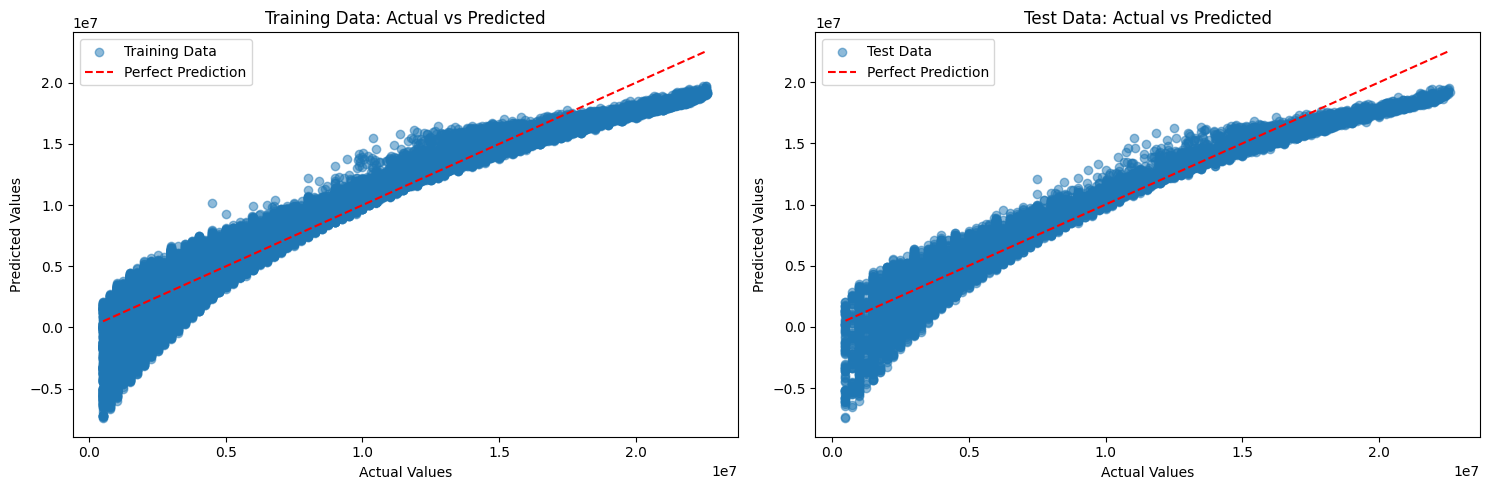

In [21]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot training data
ax1.scatter(y_train, y_train_pred, alpha=0.5, label='Training Data')
ax1.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', label='Perfect Prediction')
ax1.set_xlabel('Actual Values')
ax1.set_ylabel('Predicted Values')
ax1.set_title('Training Data: Actual vs Predicted')
ax1.legend()

# Plot test data
ax2.scatter(y_test, y_test_pred, alpha=0.5, label='Test Data')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Perfect Prediction')
ax2.set_xlabel('Actual Values')
ax2.set_ylabel('Predicted Values')
ax2.set_title('Test Data: Actual vs Predicted')
ax2.legend()

plt.tight_layout()
plt.show()
